# Анализ и выделение признаков - лабораторная работа

## ИУ5 ОАД

### Цель:
Научиться анализировать данные и выделять из них полезные признаки, научиться пользоваться `seaborn` и `sklearn`, познакомиться с основными понятиями Data Science.

**Обратите внимание**, что в каждом разделе лабораторной работы есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — отсутствие ответов приравнивается к невыполненной лабораторной работе. Ответы без кода – аналогично.

In [ ]:
#!pip install pandas matplotlib seaborn

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
%pip install folium # Устанавливает библиотеку Folium, предназначенную для создания интерактивных карт прямо в Python
                    # Folium позволяет добавлять маркеры, линии, полигоны, слой тепловой карты и другие элементы на карту

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import folium  # Импортируем библиотеку folium для работы с интерактивными картами.

# Создаем объект карты
m = folium.Map(
    location=(55.7522200, 37.6155600),  # Задаем центральную точку карты: координаты Москвы (широта, долгота).
    zoom_start=10  # Устанавливаем начальный уровень масштаба карты (10 = охватывает большой регион, например, город).
)

m  # Отображаем карту. В Jupyter Notebook карта будет интерактивной.


Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [5]:
import pandas as pd  # Импортируем библиотеку pandas для работы с табличными данными (DataFrame, Series).
import numpy as np  # Импортируем библиотеку numpy для работы с массивами и случайными числами.
import matplotlib.pyplot as plt  # Импортируем matplotlib для создания графиков.
import seaborn as sns  # Импортируем seaborn для улучшенной визуализации данных.

# Включаем отображение графиков внутри Jupyter Notebook.
%matplotlib inline

sns.set(style="darkgrid")  
# Устанавливаем стиль графиков для seaborn: "darkgrid" добавляет серый фон и сетку, что делает графики более читаемыми.

np.random.seed(0)  
# Устанавливаем фиксированное значение для генератора случайных чисел numpy.
# Это обеспечивает воспроизводимость результатов, так как одни и те же "случайные" числа будут генерироваться при каждом запуске.


## Часть 0. Подготовка (1 балл)

**Задание 1**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [6]:
df = pd.read_csv('train.csv')  
# Читаем файл CSV с именем 'train.csv' и загружаем его содержимое в объект DataFrame `df`.
# DataFrame — это табличная структура данных в pandas, похожая на таблицу в Excel или базу данных.

df.head()  
# Выводим первые 5 строк DataFrame `df` для предварительного просмотра данных.
# Используется для проверки структуры и содержания файла: заголовки столбцов, типы данных, первые записи.


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку для обучения модели машинного обучения нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [7]:
df = df.drop('dropoff_datetime', axis=1)  
# Удаляем столбец 'dropoff_datetime' из DataFrame `df`.
# Параметр `axis=1` указывает, что удаляем столбец (по оси столбцов).
# Если столбец успешно удален, обновленный DataFrame сохраняется в переменной `df`.

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])  
# Преобразуем данные в столбце 'pickup_datetime' в формат datetime (даты и времени).
# `pd.to_datetime` автоматически определяет формат данных и преобразует их в удобный тип datetime.
# После преобразования данные можно использовать для временного анализа, фильтрации, группировки по датам и т.д.


**Вопрос**: Почему нельзя использовать `dropoff_datetime` для обучения модели машинного обучения? Какие есть противоречия?

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

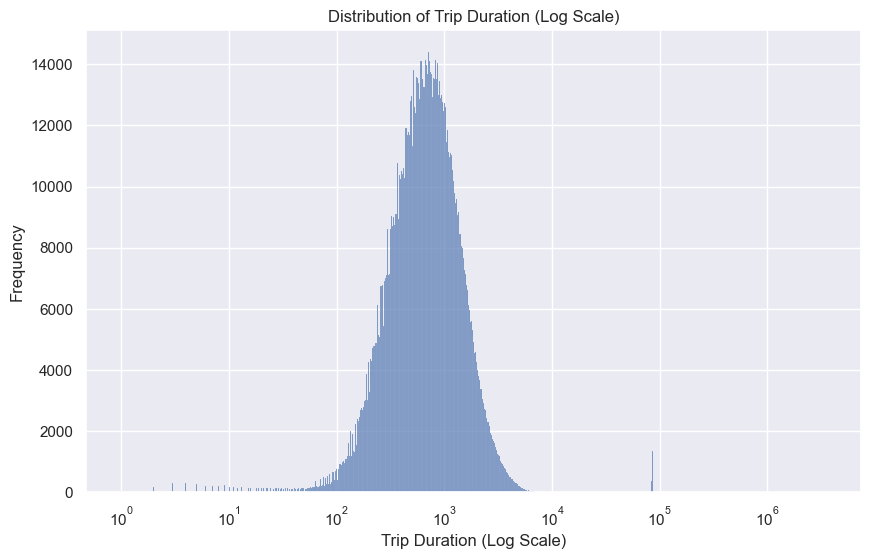

In [8]:
plt.figure(figsize=(10, 6))  
# Создаем новую фигуру для графика.
# `figsize=(10, 6)` задает размеры графика: ширина 10 дюймов, высота 6 дюймов.

sns.histplot(df['trip_duration'], log_scale=True)  
# Строим гистограмму распределения значений в столбце `trip_duration` с помощью Seaborn.
# Параметр `log_scale=True` переводит ось X (значения `trip_duration`) в логарифмический масштаб.
# Это удобно для анализа данных, если значения сильно варьируются или распределение скошено.

plt.title('Distribution of Trip Duration (Log Scale)')  
# Устанавливаем заголовок для графика.

plt.xlabel('Trip Duration (Log Scale)')  
# Устанавливаем подпись для оси X, которая теперь представляет логарифмическую шкалу длительности поездок.

plt.ylabel('Frequency')  
# Устанавливаем подпись для оси Y, которая показывает частоту встречаемости значений.

plt.show()  
# Отображаем график.


Распределение длительности поездок демонстрирует типичное поведение для подобных данных: большинство поездок имеют умеренную длительность (от 1.5 до 16 минут), что соответствует ожидаемым временным рамкам городских перемещений. Однако наблюдаются выбросы как в сторону крайне коротких, так и крайне длинных поездок. Эти выбросы могут быть связаны с техническими ошибками, необычными случаями или редкими сценариями. Логарифмическая шкала позволила лучше понять структуру данных и выявить такие аномалии.

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

## Часть 1. Изучаем `pickup_datetime`

**Задание 2**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

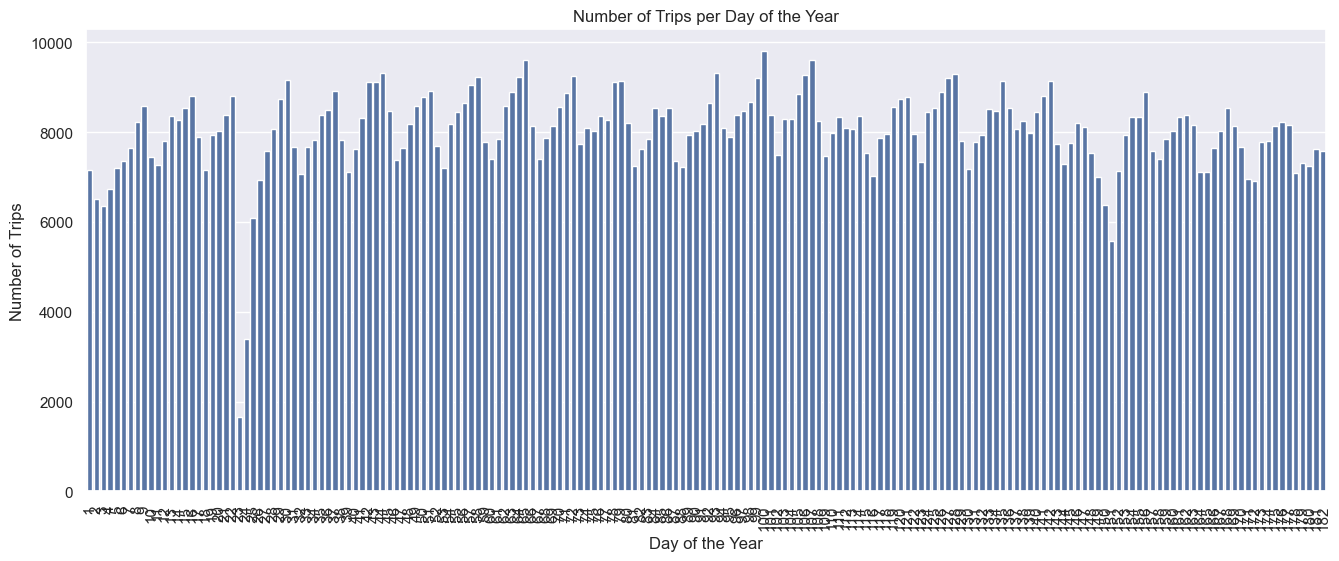

In [9]:
df['day_of_year'] = df['pickup_datetime'].dt.dayofyear  
# Добавляем новый столбец 'day_of_year' в DataFrame `df`.
# Извлекаем номер дня в году из столбца 'pickup_datetime' (например, 1 для 1 января, 365 для 31 декабря).
# Это полезно для анализа сезонности или распределения поездок по дням года.

plt.figure(figsize=(16, 6))  
# Создаем новую фигуру (область для графика).
# Параметр `figsize=(16, 6)` задает размеры графика: ширина 16 дюймов, высота 6 дюймов.

sns.countplot(x='day_of_year', data=df)  
# Создаем столбчатую диаграмму (countplot) с помощью Seaborn.
# Ось X: дни года (`day_of_year`).
# Ось Y: количество поездок (число строк в `df`, соответствующих каждому дню года).

plt.title('Number of Trips per Day of the Year')  
# Устанавливаем заголовок графика, чтобы описать его содержание.

plt.xlabel('Day of the Year')  
# Устанавливаем подпись для оси X (дни года).

plt.ylabel('Number of Trips')  
# Устанавливаем подпись для оси Y (количество поездок).

plt.xticks(rotation=90)  
# Поворачиваем метки на оси X на 90 градусов для лучшей читаемости (так как меток много).

plt.show()  
# Отображаем график.


График, показывающий количество поездок по дням года, демонстрирует, что активность в течение года относительно стабильна. Количество поездок варьируется, но нет ярко выраженных сезонных колебаний или пиков в определенные дни, что может указывать на постоянный поток поездок, возможно, характерный для городской транспортной системы или услуг по вызову такси.

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [10]:
low_trip_days = df.groupby('day_of_year')['id'].count().nsmallest(2).index  
# Группируем данные по дню года (столбец 'day_of_year') и считаем количество записей (по столбцу 'id') для каждого дня.
# `.count()` возвращает количество поездок для каждого дня.
# Используем `nsmallest(2)` для получения индексов двух дней с наименьшим количеством поездок.
# `.index` извлекает индексы этих дней.

reference_year = df['pickup_datetime'].dt.year.min()  
# Получаем минимальный год из столбца 'pickup_datetime', чтобы использовать его как ссылку (например, 2021 год).
# Это нужно, чтобы правильно составить даты в формате "год + день года".

low_trip_dates = pd.to_datetime(f'{reference_year}' + low_trip_days.astype(str), format='%Y%j')  
# Преобразуем полученные индексы (номера дней в году) в реальные даты.
# Для каждого дня года составляем строку вида "год + день года" (например, "2021" + "032" = "2021032").
# Используем `pd.to_datetime`, чтобы конвертировать это в правильный формат даты.

low_trip_dates = low_trip_dates.strftime('%Y-%m-%d')  
# Преобразуем даты в строковый формат "ГГГГ-ММ-ДД" для удобства отображения.

print(f"Dates with unusually low trip counts: {low_trip_dates}")  
# Выводим даты, когда было зафиксировано необычно низкое количество поездок.


Dates with unusually low trip counts: Index(['2016-01-23', '2016-01-24'], dtype='object', name='day_of_year')


**Задание 3**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

<Figure size 1600x800 with 0 Axes>

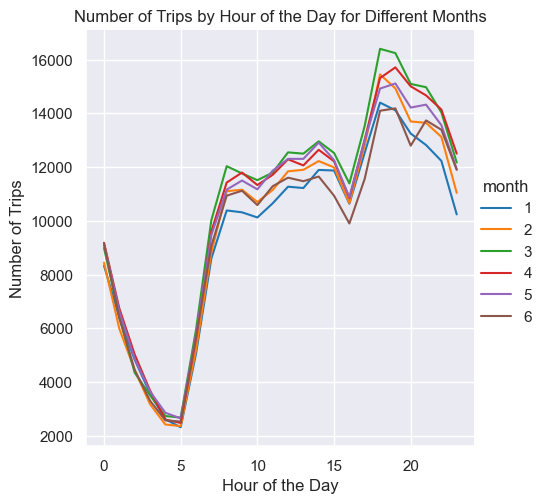

<Figure size 1600x800 with 0 Axes>

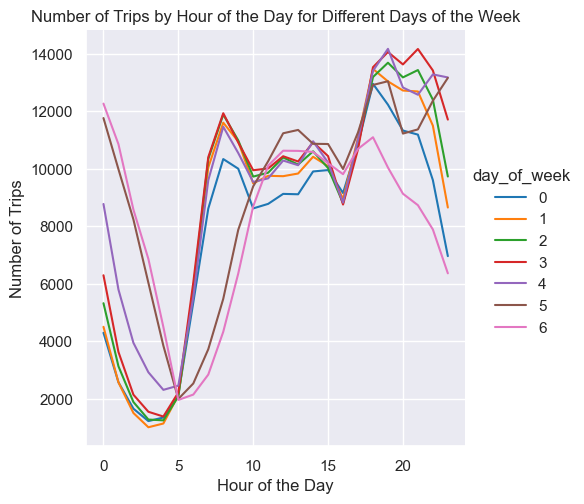

In [11]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])  
# Преобразуем столбец 'pickup_datetime' в формат даты и времени (datetime).
# Это необходимо для того, чтобы можно было работать с датами и временем, извлекать из них компоненты (например, час, день, месяц).

df['hour'] = df['pickup_datetime'].dt.hour  
# Извлекаем час из столбца 'pickup_datetime' и сохраняем его в новый столбец 'hour'.
# Это даст информацию о времени суток для каждой поездки.

df['month'] = df['pickup_datetime'].dt.month  
# Извлекаем месяц из столбца 'pickup_datetime' и сохраняем его в новый столбец 'month'.
# Это позволит анализировать поездки по месяцам.

df['day_of_week'] = df['pickup_datetime'].dt.dayofweek  
# Извлекаем день недели из столбца 'pickup_datetime' и сохраняем его в новый столбец 'day_of_week'.
# День недели будет представлен числами от 0 до 6 (0 — понедельник, 6 — воскресенье).

# Группируем данные по часам и месяцам и считаем количество поездок для каждой группы
hourly_data_by_month = df.groupby(['hour', 'month']).size().reset_index(name='trip_count')

# Группируем данные по часам и дням недели и считаем количество поездок для каждой группы
hourly_data_by_day = df.groupby(['hour', 'day_of_week']).size().reset_index(name='trip_count')

# Настроим и построим первый график — количество поездок по часам в разные месяцы
plt.figure(figsize=(16, 8))  
# Задаем размеры графика (16 дюймов по ширине и 8 дюймов по высоте).

sns.relplot(
    x='hour',  # Ось X: час
    y='trip_count',  # Ось Y: количество поездок
    hue='month',  # Цвет по месяцам, чтобы отображать разные месяцы разными цветами
    kind='line',  # Тип графика: линейный график
    data=hourly_data_by_month,  # Используем данные для анализа по часам и месяцам
    palette="tab10"  # Палитра цветов для отображения разных месяцев
)
plt.title('Number of Trips by Hour of the Day for Different Months')  
# Заголовок графика.

plt.xlabel('Hour of the Day')  
# Подпись оси X.

plt.ylabel('Number of Trips')  
# Подпись оси Y.

plt.show()  
# Отображаем первый график.

# Настроим и построим второй график — количество поездок по часам в разные дни недели
plt.figure(figsize=(16, 8))  
# Задаем размеры графика для второго графика.

sns.relplot(
    x='hour',  # Ось X: час
    y='trip_count',  # Ось Y: количество поездок
    hue='day_of_week',  # Цвет по дням недели, чтобы отображать разные дни разными цветами
    kind='line',  # Тип графика: линейный график
    data=hourly_data_by_day,  # Используем данные для анализа по часам и дням недели
    palette="tab10"  # Палитра цветов для отображения разных дней недели
)
plt.title('Number of Trips by Hour of the Day for Different Days of the Week')  
# Заголовок графика.

plt.xlabel('Hour of the Day')  
# Подпись оси X.

plt.ylabel('Number of Trips')  
# Подпись оси Y.

plt.show()  
# Отображаем второй график.


1

В графике видно, что количество поездок варьируется в зависимости от месяца. Летние месяцы (например, июнь, июль и август) показывают увеличенную активность в вечерние часы, что может быть связано с отпускными сезонами или повышенной активностью в теплое время года.

Зимние месяцы демонстрируют меньшую активность, особенно в ночные и утренние часы.

Основная активность наблюдается в пиковые часы (например, 8:00-9:00 и 17:00-18:00), что свидетельствует о влиянии рабочего времени, характерного для городской транспортной системы.

Это распределение может быть полезным для планирования ресурсов и изменения расписания в зависимости от сезона.

2

График показывает явное различие в количестве поездок в выходные и будние дни:

В выходные дни (например, суббота и воскресенье) поездки более равномерно распределены в течение дня, с наибольшими пиками в вечерние и ночные часы, что соответствует более свободному графику людей в эти дни.

В будние дни пики активности происходят в утренние часы (8:00-9:00) и вечерние (17:00-18:00), что также связано с рабочим временем.

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Задание 4**. Разбейте выборку на обучающую и тестовую в отношении 7:3, представьте, что вы готовите данные для обучения модели машинного обучения (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

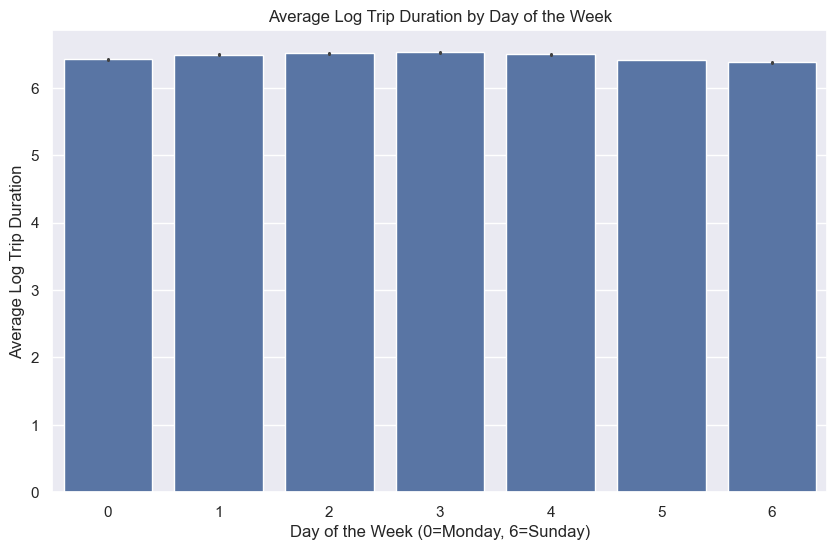

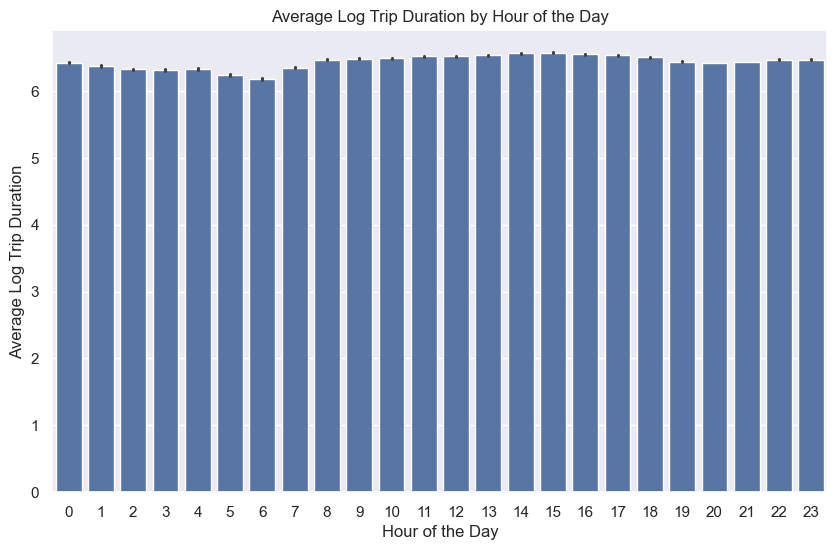

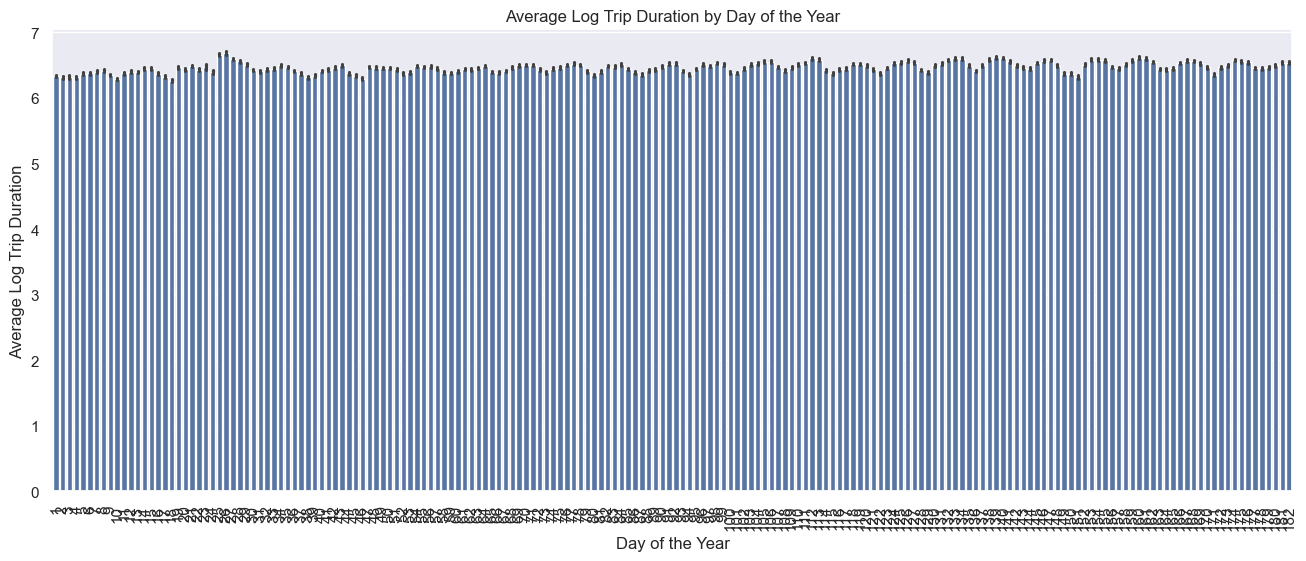

In [12]:
from sklearn.model_selection import train_test_split  # Импортируем функцию train_test_split для разделения данных на обучающую и тестовую выборки.

# Разделяем данные на обучающую и тестовую выборки (70% для обучения, 30% для тестирования).
train_df, test_df = train_test_split(df, test_size=0.3, random_state=0)  

# Добавляем новый столбец 'log_trip_duration' в обучающую выборку, в который записываем логарифм (с учетом 1) длительности поездки.
train_df['log_trip_duration'] = np.log1p(train_df['trip_duration'])  

# Построение графика для анализа средней логарифмической длительности поездок по дням недели
plt.figure(figsize=(10, 6))  # Настроим размеры графика.

# Строим столбчатую диаграмму: по оси X дни недели (0 — понедельник, 6 — воскресенье), по оси Y средняя логарифмическая длительность поездок.
sns.barplot(x=train_df['pickup_datetime'].dt.dayofweek, 
            y=train_df['log_trip_duration'], 
            data=train_df)  
plt.title('Average Log Trip Duration by Day of the Week')  # Заголовок графика.
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')  # Подпись оси X.
plt.ylabel('Average Log Trip Duration')  # Подпись оси Y.
plt.show()  # Отображаем график.

# Построение графика для анализа средней логарифмической длительности поездок по часам дня.
plt.figure(figsize=(10, 6))  # Настроим размеры графика.

# Строим столбчатую диаграмму: по оси X часы дня, по оси Y средняя логарифмическая длительность поездок.
sns.barplot(x=train_df['pickup_datetime'].dt.hour, 
            y=train_df['log_trip_duration'], 
            data=train_df)  
plt.title('Average Log Trip Duration by Hour of the Day')  # Заголовок графика.
plt.xlabel('Hour of the Day')  # Подпись оси X.
plt.ylabel('Average Log Trip Duration')  # Подпись оси Y.
plt.show()  # Отображаем график.

# Построение графика для анализа средней логарифмической длительности поездок по дням года.
plt.figure(figsize=(16, 6))  # Настроим размеры графика.

# Строим столбчатую диаграмму: по оси X дни года, по оси Y средняя логарифмическая длительность поездок.
sns.barplot(x=train_df['pickup_datetime'].dt.dayofyear, 
            y=train_df['log_trip_duration'], 
            data=train_df)  
plt.title('Average Log Trip Duration by Day of the Year')  # Заголовок графика.
plt.xlabel('Day of the Year')  # Подпись оси X.
plt.ylabel('Average Log Trip Duration')  # Подпись оси Y.
plt.xticks(rotation=90)  # Поворачиваем метки на оси X для лучшей читаемости.
plt.show()  # Отображаем график.


На графике видно, что средняя логарифмическая длительность поездок по дням недели равномерна. Все дни недели (понедельник, вторник, среда и т.д.) имеют схожие значения, что указывает на отсутствие значительных различий в длительности поездок в зависимости от дня недели.

Это может свидетельствовать о том, что поездки в разные дни недели имеют схожие продолжительности, и нет явных пиков или спадов в зависимости от того, является ли день будним или выходным.

График показывает, что средняя логарифмическая длительность поездок по часам дня остается постоянной. Значения столбцов по всей оси X (часы дня) очень похожи, что указывает на отсутствие значительных различий в длительности поездок в разное время суток.

Это может означать, что поездки в течение дня, в целом, имеют схожую продолжительность, независимо от того, раннее это утро, день или вечер.




**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [13]:
# Добавляем день недели в DataFrame
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek  
# Извлекаем день недели из столбца 'pickup_datetime' и сохраняем его в новый столбец 'day_of_week'.
# Метод .dt.dayofweek возвращает целое число от 0 (понедельник) до 6 (воскресенье).

# Добавляем месяц в DataFrame
df['month'] = df['pickup_datetime'].dt.month  
# Извлекаем месяц из столбца 'pickup_datetime' и сохраняем его в новый столбец 'month'.
# Метод .dt.month возвращает число от 1 (январь) до 12 (декабрь).

# Добавляем час в DataFrame
df['hour'] = df['pickup_datetime'].dt.hour  
# Извлекаем час из столбца 'pickup_datetime' и сохраняем его в новый столбец 'hour'.
# Метод .dt.hour возвращает целое число от 0 до 23, представляющее час в дне.

# Добавляем день года в DataFrame
df['day_of_year'] = df['pickup_datetime'].dt.dayofyear  
# Извлекаем номер дня в году из столбца 'pickup_datetime' и сохраняем его в новый столбец 'day_of_year'.
# Метод .dt.dayofyear возвращает целое число от 1 до 365 (или 366 для високосного года), представляющее день в году.


Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

## Часть 2. Изучаем координаты
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [14]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    Функция строит карту с кругами, расположенными по данным координатам.
    Центр карты — это среднее значение координат, переданных в данных.
    
    data: DataFrame, который содержит столбцы с координатами (широта и долгота)
    latitude_column: строка, название столбца с данными о широте
    longitude_column: строка, название столбца с данными о долготе
    color: строка, цвет кругов, которые будут отображены на карте
    """

    # Определяем центр карты как среднее значение координат широты и долготы
    location = (data[latitude_column].mean(), data[longitude_column].mean())  
    # Средние значения широты и долготы, чтобы установить центр карты
    m = folium.Map(location=location)  # Создаем объект карты, с центром в `location`

    # Для каждой строки в данных (каждой поездки) добавляем круг на карту
    for _, row in data.iterrows():  
        # Для каждого ряда данных добавляем круг на карту
        folium.Circle(
            radius=100,  # Устанавливаем радиус круга (в метрах)
            location=(row[latitude_column], row[longitude_column]),  # Устанавливаем координаты центра круга
            color=color,  # Цвет круга
            fill_color=color,  # Цвет заливки круга
            fill=True  # Включаем заливку круга
        ).add_to(m)  # Добавляем круг на карту

    return m  # Возвращаем объект карты с нанесенными кругами


In [15]:
# Пример вызова функции для отображения 1000 случайных точек на карте с синими кругами
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")


In [16]:
# Вызов функции для отображения 1000 случайных точек на карте с синими кругами, используя координаты для dropoff
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")


**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

**Задание 5**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [17]:
def haversine(lat1, lon1, lat2, lon2):
    # Радиус Земли в километрах
    R = 6371.0  # Используем радиус Земли для вычисления расстояния в километрах

    # Преобразуем широты и долготы из градусов в радианы
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    # Функция np.radians преобразует градусы в радианы, потому что математические функции используют радианы

    # Разницы в координатах
    dlat = lat2 - lat1  # Разница в широте
    dlon = lon2 - lon1  # Разница в долготе

    # Формула Haversine для вычисления расстояния на поверхности Земли
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))  # Арксинус от квадратного корня выражения

    # Расстояние между двумя точками на Земле
    distance = R * c  # Умножаем на радиус Земли, чтобы получить расстояние в километрах
    return distance

# Вычисляем расстояние по формуле Haversine для каждой строки DataFrame
train_df['haversine'] = haversine(train_df['pickup_latitude'],
                                     train_df['pickup_longitude'],
                                     train_df['dropoff_latitude'],
                                     train_df['dropoff_longitude'])
# В столбец 'haversine' сохраняем результат вычислений расстояния между точками 'pickup' и 'dropoff'

# Выводим список всех столбцов DataFrame train_df
print(train_df.columns)


Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'day_of_year', 'hour', 'month', 'day_of_week', 'log_trip_duration',
       'haversine'],
      dtype='object')


Так как мы можем предсказывать логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [18]:
# Преобразуем расстояние (haversine) в логарифмическую шкалу с добавлением 1 (для предотвращения проблемы с нулями)
train_df['log_haversine'] = np.log1p(train_df['haversine'])  

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [19]:
# Сохраняем train_df в переменную your_df для дальнейшей работы
your_df = train_df

# Проверяем, что корреляция между log_haversine и log_trip_duration выше, чем между haversine и log_trip_duration
assert your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])
# Это условие проверяет, что логарифмированное расстояние имеет более сильную корреляцию с логарифмированной длительностью поездки,
# что может указывать на более линейную зависимость между этими переменными.

**Задание 6**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

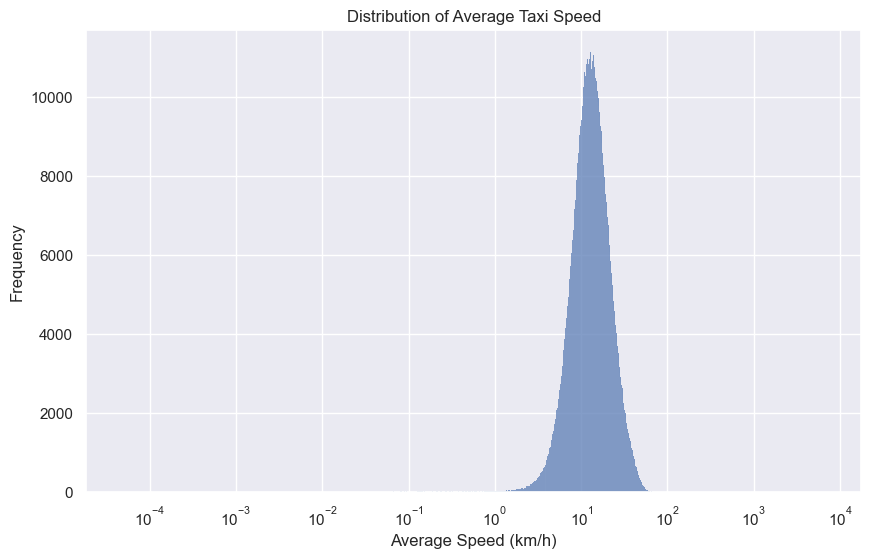

In [20]:
# Вычисляем среднюю скорость (в км/ч) на основе расстояния (haversine) и длительности поездки
train_df['avg_speed'] = train_df['haversine'] * 3600 / train_df['trip_duration']  
# Умножаем на 3600 (чтобы перевести секунды в часы), делим на длительность поездки для получения средней скорости в км/ч.

# Строим гистограмму средней скорости
plt.figure(figsize=(10, 6))  # Настроим размер графика
sns.histplot(train_df['avg_speed'], log_scale=True)  # Строим гистограмму с логарифмическим масштабом по оси Y
# `log_scale=True` позволяет лучше визуализировать данные с большим разбросом значений (например, выбросы или очень высокие скорости)
plt.title('Distribution of Average Taxi Speed')  # Заголовок графика
plt.xlabel('Average Speed (km/h)')  # Подпись оси X
plt.ylabel('Frequency')  # Подпись оси Y
plt.show()  # Отображаем график

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

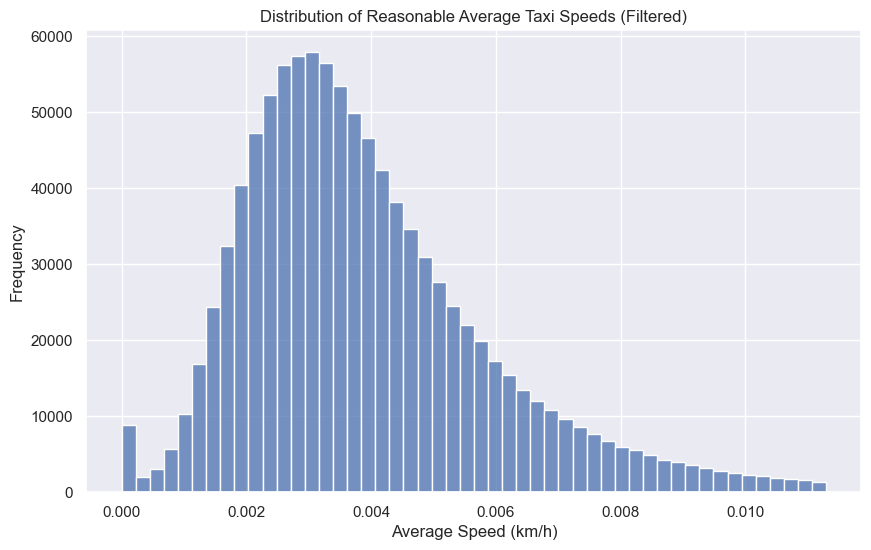

In [21]:
# Вычисляем среднюю скорость
train_df['avg_speed'] = train_df['haversine'] / train_df['trip_duration']  
# Средняя скорость рассчитывается как отношение расстояния (в километрах) к времени (в часах).
# Мы делим расстояние (в км) на длительность поездки (в секундах), чтобы получить скорость в км/ч.

# Определяем пороговое значение для разумной скорости (например, 99-й процентиль)
speed_threshold = train_df['avg_speed'].quantile(0.99)  
# Используем метод `.quantile(0.99)` для вычисления 99-го процентиля. Это значение будет служить порогом для разумных скоростей.
# Все скорости выше этого значения будут считаться выбросами и исключены из анализа.

# Отфильтровываем DataFrame, оставляя только разумные скорости (меньше или равные пороговому значению)
filtered_train_df = train_df[train_df['avg_speed'] <= speed_threshold]  
# Фильтруем DataFrame, чтобы оставить только те строки, где средняя скорость меньше или равна пороговому значению.

# Строим гистограмму отфильтрованных средних скоростей
plt.figure(figsize=(10, 6))  # Настроим размеры графика
sns.histplot(filtered_train_df['avg_speed'], bins=50)  # Строим гистограмму с 50 столбцами (бинами)
plt.title('Distribution of Reasonable Average Taxi Speeds (Filtered)')  # Заголовок графика
plt.xlabel('Average Speed (km/h)')  # Подпись оси X
plt.ylabel('Frequency')  # Подпись оси Y
plt.show()  # Отображаем график


Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

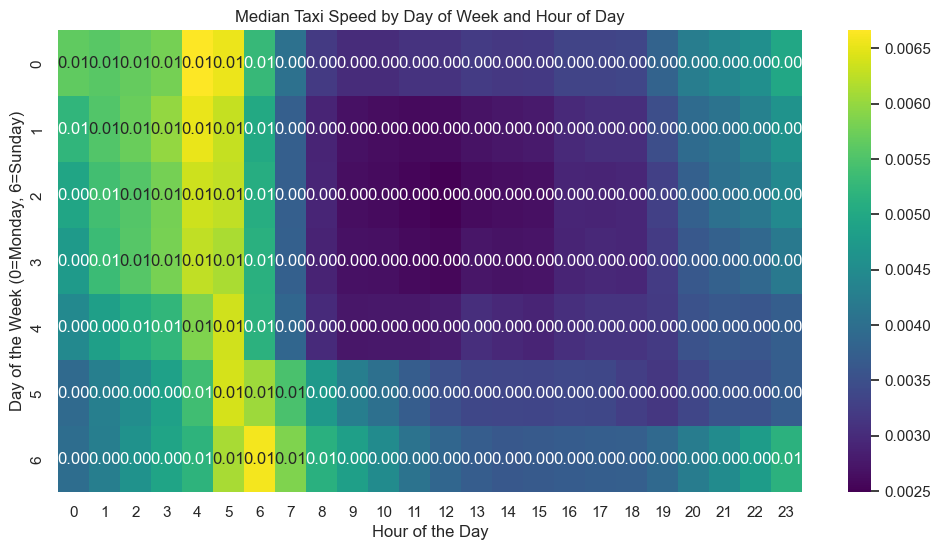

In [22]:
# Вычисляем среднюю скорость (если еще не вычислена)
train_df['avg_speed'] = train_df['haversine'] / train_df['trip_duration']  
# Средняя скорость рассчитывается как отношение расстояния (в километрах) к времени (в часах).
# Для этого нужно делить расстояние (haversine) на длительность поездки (trip_duration) в секундах, чтобы получить скорость в км/ч.

# Группируем данные по дням недели и часам, затем вычисляем медиану средней скорости
median_speeds = train_df.groupby([train_df['pickup_datetime'].dt.dayofweek,  # Группируем по дню недели
                                  train_df['pickup_datetime'].dt.hour])['avg_speed'].median().unstack()  
# `.groupby()` используется для группировки данных по дням недели и часам (с использованием .dt.dayofweek и .dt.hour).
# Для каждой группы вычисляем медиану скорости.
# `.unstack()` преобразует результат в таблицу, где строки — это дни недели, а столбцы — часы.

# Создаем тепловую карту
plt.figure(figsize=(12, 6))  # Настроим размер графика

# Строим тепловую карту с медианными значениями скорости
sns.heatmap(median_speeds, cmap='viridis', annot=True, fmt=".2f")  
# `cmap='viridis'`: выбираем цветовую палитру для отображения тепловой карты.
# `annot=True`: отображаем значения на самой тепловой карте.
# `fmt=".2f"`: форматируем значения до двух знаков после запятой.

# Добавляем заголовок и подписи
plt.title('Median Taxi Speed by Day of Week and Hour of Day')  # Заголовок графика
plt.xlabel('Hour of the Day')  # Подпись оси X (часы дня)
plt.ylabel('Day of the Week (0=Monday, 6=Sunday)')  # Подпись оси Y (день недели)

# Отображаем график
plt.show()  


Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

In [23]:
train_df = train_df.drop('avg_speed', axis=1) # Удаление столбца 'avg_speed'

## Часть 3. Изучаем оставшиеся признаки

**Задание 9**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [24]:
# Подсчитываем количество уникальных значений для каждого признака
unique_values = {
    'vendor_id': df['vendor_id'].nunique(),  # Считаем количество уникальных значений в столбце 'vendor_id'
    'passenger_count': df['passenger_count'].nunique(),  # Считаем количество уникальных значений в столбце 'passenger_count'
    'store_and_fwd_flag': df['store_and_fwd_flag'].nunique()  # Считаем количество уникальных значений в столбце 'store_and_fwd_flag'
}

# Выводим количество уникальных значений для каждого столбца
print(unique_values)


{'vendor_id': 2, 'passenger_count': 10, 'store_and_fwd_flag': 2}


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

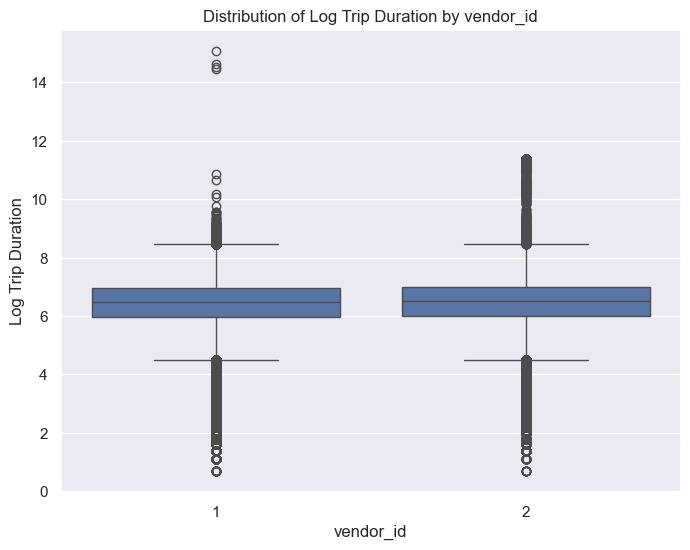

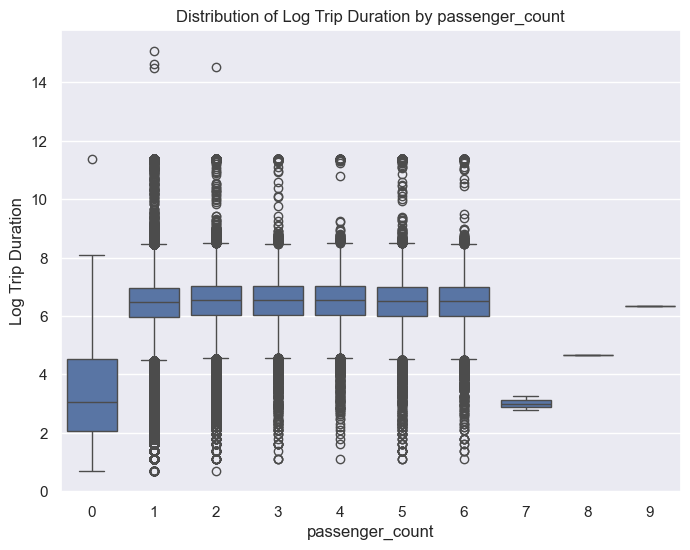

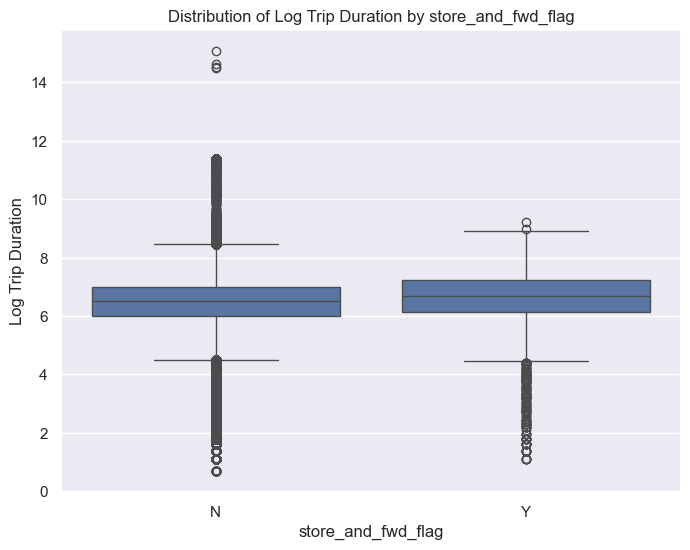

In [25]:
import seaborn as sns  # Импортируем библиотеку seaborn для визуализации данных
import matplotlib.pyplot as plt  # Импортируем matplotlib для создания графиков

# Рассчитываем log_trip_duration, если его еще нет в DataFrame
df['log_trip_duration'] = np.log1p(df['trip_duration'])  
# Вычисляем логарифм длительности поездки (с добавлением 1, чтобы избежать логарифмирования нуля).
# Это полезно для нормализации данных и улучшения визуализации, особенно если данные сильно скошены.

# Список признаков для построения графиков
features = ['vendor_id', 'passenger_count', 'store_and_fwd_flag']

# Цикл по каждому признаку для создания боксплота
for feature in features:
    plt.figure(figsize=(8, 6))  # Настроим размер графика (ширина 8 дюймов, высота 6 дюймов)
    sns.boxplot(x=feature, y='log_trip_duration', data=df)  
    # Строим боксплот:
    # - `x=feature` указывает, что мы будем группировать данные по признаку `feature`.
    # - `y='log_trip_duration'` указывает, что на оси Y будет отображаться логарифмированная длительность поездки.
    # - `data=df` передает DataFrame, в котором содержатся данные.
    
    plt.title(f'Distribution of Log Trip Duration by {feature}')  # Заголовок графика
    plt.xlabel(feature)  # Подпись оси X, которая соответствует текущему признаку
    plt.ylabel('Log Trip Duration')  # Подпись оси Y (логарифмированная длительность поездки)
    plt.show()  # Отображаем график


Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [26]:
# Преобразуем 'vendor_id' в бинарный формат (предполагаем, что значения 1 и 2)
df['vendor_id'] = df['vendor_id'].map({1: 0, 2: 1})  
# Метод .map() используется для преобразования значений в столбце 'vendor_id' в бинарный формат:
# 1 будет преобразовано в 0, а 2 — в 1.
# Это полезно, если столбец 'vendor_id' используется как категориальная переменная, и нужно привести ее к числовому виду.

# Преобразуем 'store_and_fwd_flag' в бинарный формат (предполагаем, что значения 'N' и 'Y')
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'N': 0, 'Y': 1})  
# С помощью .map() преобразуем значения в столбце 'store_and_fwd_flag' в бинарные значения:
# 'N' (No) преобразуется в 0, а 'Y' (Yes) преобразуется в 1.
# Это полезно, когда нужно работать с бинарными признаками в модели машинного обучения.


**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

## Часть 4. Улучшаем данные

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие). 

In [27]:
# 1. Определяем категориальные признаки
categorical_features = ['vendor_id', 'store_and_fwd_flag', 'passenger_count',
                        'day_of_week', 'month', 'hour']
# Включаем другие категориальные признаки, если таковые имеются.
# Это список признаков, которые являются категориальными, и мы будем с ними работать в дальнейшем.

# 2. Устанавливаем порог для редких категорий (например, 5%)
rare_threshold = 0.05
# Мы определяем порог редкости категорий. Если доля категорий меньше 5%, они будут считаться редкими.

# 3. Обрабатываем каждый категориальный признак
for feature in categorical_features:
    # Вычисляем частоты категорий для каждого признака
    category_frequencies = train_df[feature].value_counts(normalize=True)
    # .value_counts(normalize=True) рассчитывает долю каждой категории в данных (нормализует частоты).
    
    # Идентифицируем редкие категории
    rare_categories = category_frequencies[category_frequencies < rare_threshold].index
    # Находим категории, которые встречаются реже, чем пороговое значение (5%).
    
    # Заменяем редкие категории на 'rare' в обучающем и тестовом наборах данных
    train_df.loc[train_df[feature].isin(rare_categories), feature] = 'rare'
    test_df.loc[test_df[feature].isin(rare_categories), feature] = 'rare'
    # Для каждой строки в данных, если категория принадлежит редким категориям, мы заменяем ее на 'rare'.
    # Это позволяет объединить редкие категории в одну и уменьшить количество категорий для дальнейшей обработки.


C:\Users\shaki\AppData\Local\Temp\ipykernel_21304\3395517328.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'rare' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_df.loc[train_df[feature].isin(rare_categories), feature] = 'rare'
C:\Users\shaki\AppData\Local\Temp\ipykernel_21304\3395517328.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'rare' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test_df.loc[test_df[feature].isin(rare_categories), feature] = 'rare'
C:\Users\shaki\AppData\Local\Temp\ipykernel_21304\3395517328.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'rare' has dtype incompatible with int64, please explicitly cast to a compatib

**Задание 11**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [28]:
import pandas as pd  # Импортируем библиотеку pandas для работы с DataFrame
from sklearn.preprocessing import OneHotEncoder  # Импортируем OneHotEncoder для выполнения one-hot кодирования

# 1. Количество признаков до one-hot кодирования
num_features_before = len(train_df.columns)  
# Считаем количество признаков в DataFrame `train_df` до применения one-hot кодирования.
# Это число будет включать как числовые, так и категориальные признаки.

# 2. One-hot кодирование
categorical_features = ['vendor_id', 'store_and_fwd_flag', 'passenger_count',
                         'day_of_week', 'month', 'hour']
# Список категориальных признаков, которые нужно закодировать с помощью one-hot кодирования.
# Можно добавлять или удалять признаки в зависимости от ваших данных.

# Создаем и обучаем энкодер
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  
# `sparse_output=False`: мы указываем, что вывод будет в плотном формате (numpy массив), а не в разреженном формате.
# `handle_unknown='ignore'`: это означает, что если в тестовых данных встречаются неизвестные категории, они будут проигнорированы, а не вызовут ошибку.

# Применяем one-hot кодирование к данным
encoded_data = encoder.fit_transform(df[categorical_features])  # Обучаем энкодер и применяем его к данным

# 3. Количество признаков после one-hot кодирования
num_features_after = num_features_before - len(categorical_features) + encoded_data.shape[1]  
# Новое количество признаков после one-hot кодирования: количество признаков до кодирования минус количество категориальных признаков, 
# добавленных в список `categorical_features`, плюс количество новых признаков, созданных one-hot кодированием.
# `encoded_data.shape[1]` дает количество новых признаков (один для каждой категории).

# Выводим результаты
print(f"Number of features before one-hot encoding: {num_features_before}")  
# Количество признаков до one-hot кодирования
print(f"Number of features after one-hot encoding: {num_features_after}")  
# Количество признаков после one-hot кодирования


Number of features before one-hot encoding: 17
Number of features after one-hot encoding: 62


<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 12**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут.

**Вопрос**: Почему такой признак потенциально полезный? 

In [29]:
import pandas as pd  # Импортируем библиотеку pandas для работы с данными
from collections import Counter  # Импортируем Counter для подсчета частоты встречаемости элементов

# Создание признака "откуда-куда" как пары координат (pickup и dropoff)
df['pickup_dropoff_pair'] = list(zip(df['pickup_longitude'], df['pickup_latitude'],
                                     df['dropoff_longitude'], df['dropoff_latitude']))
# Мы создаем новый столбец `pickup_dropoff_pair`, который будет содержать кортежи координат для каждой поездки.
# Для каждой строки в данных формируется кортеж, включающий долготу и широту как для точки отправления (pickup), так и для точки назначения (dropoff).

# Подсчёт частоты встречаемости маршрутов
route_counter = Counter(df['pickup_dropoff_pair'])  
# Используем `Counter` для подсчета, сколько раз каждый маршрут встречается в данных. 
# Каждый кортеж в столбце `pickup_dropoff_pair` будет подсчитан как отдельный маршрут.

# Получаем 100 самых популярных маршрутов
most_common_routes = [route for route, count in route_counter.most_common(100)]  
# `most_common(100)` возвращает 100 самых встречающихся маршрутов (по убыванию частоты).
# С помощью list comprehension мы получаем только маршруты (кортежи), игнорируя частоту.

# Функция для кодирования маршрутов
def encode_routes(pair):
    if pair in most_common_routes:
        return most_common_routes.index(pair)  # Возвращаем индекс маршрута в списке самых популярных
    else:
        return -1  # Если маршрут не является популярным, возвращаем -1

# Применяем функцию кодирования к столбцу с маршрутами
df['route_category'] = df['pickup_dropoff_pair'].apply(encode_routes)  
# Для каждого маршрута в столбце `pickup_dropoff_pair` мы применяем функцию `encode_routes`, чтобы закодировать маршрут.

# Печать первых строк DataFrame с новыми признаками
print(df[['pickup_dropoff_pair', 'route_category']].head())  
# Выводим первые несколько строк нового DataFrame, показывающего маршруты и их категориальный код.


                                 pickup_dropoff_pair  route_category
0  (-73.98215484619139, 40.76793670654297, -73.96...              -1
1  (-73.98041534423827, 40.738563537597656, -73.9...              -1
2  (-73.97902679443358, 40.763938903808594, -74.0...              -1
3  (-74.01004028320312, 40.719970703125, -74.0122...              -1
4  (-73.97305297851561, 40.79320907592773, -73.97...              -1


**Задание 13 (бонус)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси.

In [30]:
import numpy as np  # Импортируем библиотеку NumPy для работы с математическими операциями

# Функция вычисления манхэттенского расстояния
def manhattan_distance(row):
    # Вычисляем манхэттенское расстояние: сумма абсолютных разностей по широте и долготе
    return abs(row['pickup_longitude'] - row['dropoff_longitude']) + abs(row['pickup_latitude'] - row['dropoff_latitude'])

# Добавление признака манхэттенского расстояния в DataFrame
df['manhattan_distance'] = df.apply(manhattan_distance, axis=1)  
# Используем метод `apply()`, чтобы применить функцию `manhattan_distance` ко всем строкам DataFrame.
# `axis=1` указывает, что функция будет применяться построчно.

# Логарифм манхэттенского расстояния (для нормализации)
df['log_manhattan_distance'] = np.log1p(df['manhattan_distance'])  
# Вычисляем логарифм манхэттенского расстояния с добавлением 1 (чтобы избежать логарифмирования нуля).
# Это преобразование помогает уменьшить влияние очень больших значений на модель и делает распределение более симметричным.

# Корреляция между манхэттенским расстоянием и длительностью поездки
manhattan_corr = df[['manhattan_distance', 'trip_duration']].corr().iloc[0, 1]  
# Вычисляем корреляцию между столбцами 'manhattan_distance' и 'trip_duration'. 
# `corr()` вычисляет коэффициент корреляции Пирсона, а `iloc[0, 1]` извлекает значение корреляции.

# Корреляция между логарифмом манхэттенского расстояния и длительностью поездки
log_manhattan_corr = df[['log_manhattan_distance', 'trip_duration']].corr().iloc[0, 1]  
# То же самое для логарифма манхэттенского расстояния и длительности поездки.

# Выводим результаты
print(f"Корреляция манхэттенского расстояния с trip_duration: {manhattan_corr}")  
print(f"Корреляция логарифма манхэттенского расстояния с trip_duration: {log_manhattan_corr}")


Корреляция манхэттенского расстояния с trip_duration: 0.09473765172178358
Корреляция логарифма манхэттенского расстояния с trip_duration: 0.10191675367139731


c:\Users\shaki\OneDrive\Programming\OAD\2-4\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


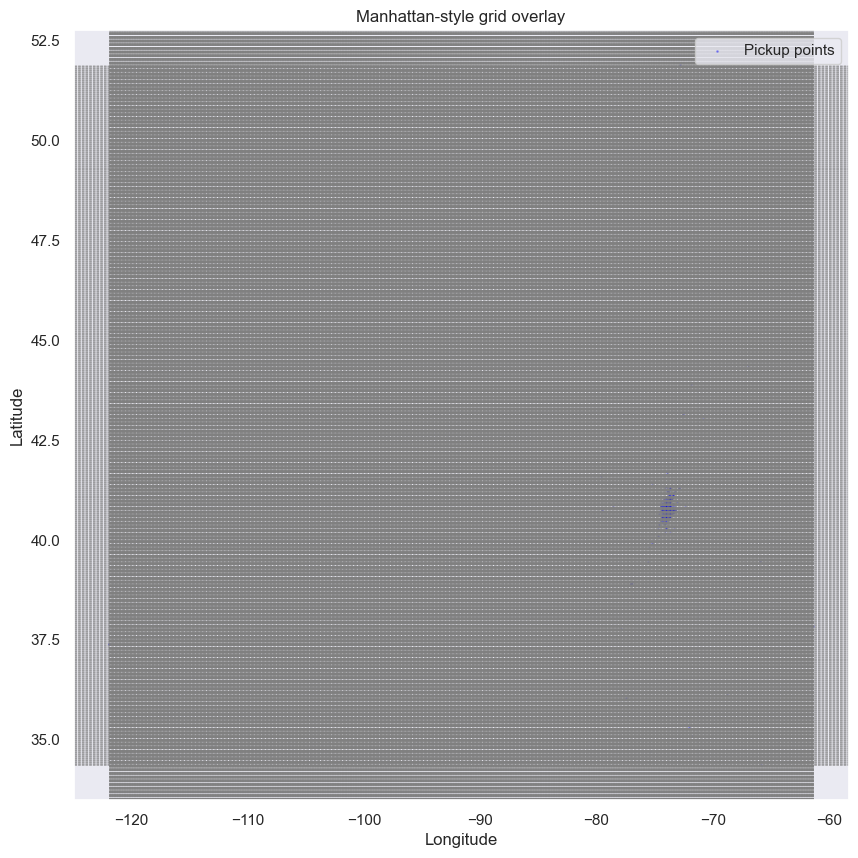

In [31]:
import matplotlib.pyplot as plt  # Импортируем библиотеку для визуализации данных

# Примерные границы Манхэттена
pickup_lat = df['pickup_latitude']  # Получаем широту точек отправления
pickup_lon = df['pickup_longitude']  # Получаем долготу точек отправления

plt.figure(figsize=(10, 10))  # Создаем график с размером 10x10 дюймов
plt.scatter(pickup_lon, pickup_lat, alpha=0.3, s=1, label="Pickup points", c='blue')  
# Строим график точек, представляющих координаты отправления:
# - `alpha=0.3`: делает точки полупрозрачными,
# - `s=1`: устанавливает размер точек (маленькие),
# - `label="Pickup points"`: добавляем метку для легенды,
# - `c='blue'`: задаем цвет точек.

# Добавление сетки улиц Манхэттена
for lat in np.arange(pickup_lat.min(), pickup_lat.max(), 0.01):  # Примерный шаг сетки по широте
    plt.axhline(y=lat, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)  
    # Для каждой широты (с шагом 0.01) добавляем горизонтальные линии (вдоль оси Y):
    # - `y=lat`: положение линии по широте,
    # - `color='gray'`: цвет линии,
    # - `linestyle='--'`: пунктирная линия,
    # - `linewidth=0.5`: толщина линии,
    # - `alpha=0.5`: прозрачность линии.

for lon in np.arange(pickup_lon.min(), pickup_lon.max(), 0.01):  # Примерный шаг сетки по долготе
    plt.axvline(x=lon, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)  
    # Для каждой долготы (с шагом 0.01) добавляем вертикальные линии (вдоль оси X):
    # - `x=lon`: положение линии по долготе.

plt.xlabel("Longitude")  # Подпись оси X (долгота)
plt.ylabel("Latitude")  # Подпись оси Y (широта)
plt.title("Manhattan-style grid overlay")  # Заголовок графика
plt.legend()  # Отображаем легенду
plt.grid(False)  # Отключаем стандартную сетку графика
plt.show()  # Отображаем график


**Задание 14 **. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

In [32]:
import h3  # Импортируем библиотеку H3 для работы с геопространственными индексами
import pandas as pd  # Импортируем библиотеку pandas для работы с данными в таблицах
import numpy as np  # Импортируем библиотеку numpy для математических операций

# Функция для преобразования координат в H3 индекс
def get_h3_index(lat, lon, resolution):
    # Преобразуем географические координаты (широта, долгота) в индекс H3 с заданным разрешением
    return h3.geo_to_h3(lat, lon, resolution)
    # Функция `geo_to_h3` из библиотеки H3 принимает широту (lat), долготу (lon) и разрешение.
    # Разрешение определяет уровень детализации, чем выше разрешение, тем больше шестиугольников будет покрывать область.

# Расстояние между шестиугольниками в "шаговых" единицах
def hex_distance(start_hex, end_hex):
    try:
        # Используем H3 для вычисления расстояния между двумя шестиугольниками
        return h3.h3_distance(start_hex, end_hex)
    except Exception:  # Если расстояние невозможно рассчитать (например, из-за отсутствия пути), возвращаем NaN
        return np.nan
    # Функция `h3_distance` из библиотеки H3 вычисляет расстояние (в "шаговых" единицах) между двумя шестиугольниками.
    # В случае ошибки (например, если шестиугольники находятся слишком далеко или их нельзя связать), возвращается значение `NaN`.
